In [254]:
import pandas as pd
import numpy as np

In [268]:
df = pd.read_csv('/content/macro_monthly.csv', parse_dates=True)

In [256]:
df.head()

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1981-01-01,7.5,10.9,1612.900,4980.4,1870.0,NaN,12.568571,19.084516,NaN,51.1668,85.4
1,1981-02-01,7.4,10.8,1608.125,4965.0,1884.2,NaN,13.194444,15.934286,NaN,50.9509,85.9
2,1981-03-01,7.4,10.8,1629.400,4979.0,1902.9,NaN,13.115909,14.703871,NaN,51.2066,86.4
3,1981-04-01,7.2,10.9,1665.575,4965.1,1904.4,NaN,13.679524,15.719000,NaN,50.9711,87.0
4,1981-05-01,7.5,11.0,1655.150,4974.8,1913.8,NaN,14.099500,18.517742,NaN,51.2645,87.8


In [5]:
df.shape

(490, 12)


    'DATE': 'Date',
    'unrate': 'Unemployment_Rate',
    'psr': 'Personal_Savings_Rate',
    'm2': 'M2_Money_Stock',
    'dspic': 'Disposable_Personal_Income',
    'pce': 'Personal_Consumption_Expenditures',
    'reer': 'Real_Effective_Exchange_Rate',
    'ir': 'Interest_Rate',
    'ffer': 'Federal_Funds_Effective_Rate',
    'tcs': 'Total_Construction_Spending',
    'indpro': 'Industrial_Production_Index',
    'ccpi': 'Consumer_Price_Index'



In [140]:
df.dtypes

DATE       object
unrate    float64
psr       float64
m2        float64
dspic     float64
pce       float64
reer      float64
ir        float64
ffer      float64
tcs       float64
indpro    float64
ccpi      float64
dtype: object

In [121]:
#df['DATE'] = pd.to_datetime(df['DATE'])

In [81]:
df['DATE'].nunique()

490

In [63]:
df.duplicated().sum()

0

In [264]:
data = df.copy()
data.head()

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1981-01-01,7.5,10.9,1612.900,4980.4,1870.0,NaN,12.568571,19.084516,NaN,51.1668,85.4
1,1981-02-01,7.4,10.8,1608.125,4965.0,1884.2,NaN,13.194444,15.934286,NaN,50.9509,85.9
2,1981-03-01,7.4,10.8,1629.400,4979.0,1902.9,NaN,13.115909,14.703871,NaN,51.2066,86.4
3,1981-04-01,7.2,10.9,1665.575,4965.1,1904.4,NaN,13.679524,15.719000,NaN,50.9711,87.0
4,1981-05-01,7.5,11.0,1655.150,4974.8,1913.8,NaN,14.099500,18.517742,NaN,51.2645,87.8


# **Calculating percentage change in the 'ccpi' to find inflation:**

fillna(0): Replaces first missing value resulting from the percentage change calculation with 0.

In [269]:
data['cpi_pct_mom'] = round((data['ccpi'].pct_change().fillna(0))*100,2)
data['cpi_pct_yoy'] = round((data['ccpi'].pct_change(12).fillna(0))*100,2)
data.head()

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi,year,quarter,month,cpi_pct_mom,cpi_pct_yoy
0,1981-01-01,7.5,10.9,1612.900,4980.4,1870.0,NaN,12.568571,19.084516,NaN,51.1668,85.4,1981,1,1,0.00,0.0
1,1981-02-01,7.4,10.8,1608.125,4965.0,1884.2,NaN,13.194444,15.934286,NaN,50.9509,85.9,1981,1,2,0.59,0.0
2,1981-03-01,7.4,10.8,1629.400,4979.0,1902.9,NaN,13.115909,14.703871,NaN,51.2066,86.4,1981,1,3,0.58,0.0
3,1981-04-01,7.2,10.9,1665.575,4965.1,1904.4,NaN,13.679524,15.719000,NaN,50.9711,87.0,1981,2,4,0.69,0.0
4,1981-05-01,7.5,11.0,1655.150,4974.8,1913.8,NaN,14.099500,18.517742,NaN,51.2645,87.8,1981,2,5,0.92,0.0


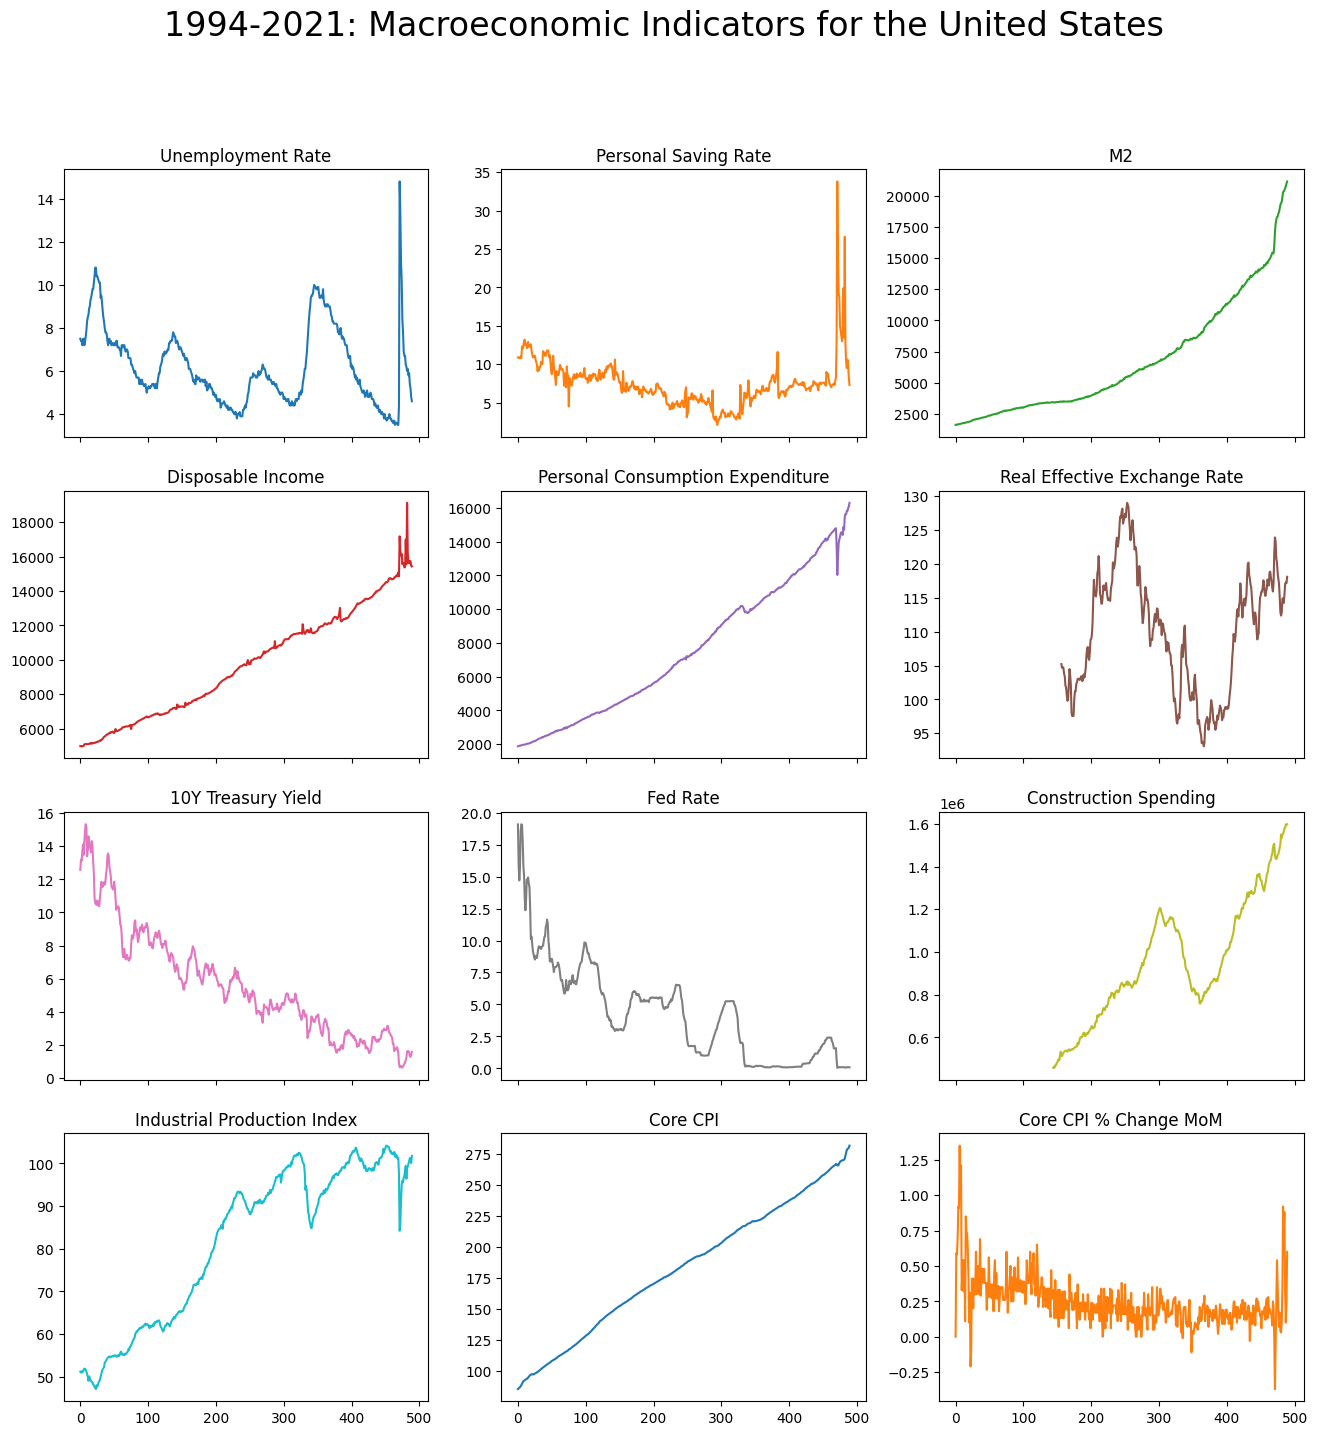

In [259]:
import matplotlib.pyplot as plt

# Plotting multiple line plots for columns in monthly_df
data.iloc[:, 1:13].plot(
    kind='line',
    subplots=True,
    figsize=(16, 16),
    title=['Unemployment Rate', 'Personal Saving Rate', 'M2', 'Disposable Income', 'Personal Consumption Expenditure', 'Real Effective Exchange Rate',
           '10Y Treasury Yield', 'Fed Rate', 'Construction Spending', 'Industrial Production Index', 'Core CPI', 'Core CPI % Change MoM'],
    legend=False,
    layout=(4, 3),
    sharex=True
)

# Adding a super title to the entire plot
plt.suptitle('1994-2021: Macroeconomic Indicators for the United States', fontsize=24)

# Display the plot
plt.show()

# **Extracting year, quarter, and month columns from the 'DATE' column for each row:**

In [270]:
# Assuming df is your DataFrame
# Convert 'DATE' column to datetime if it's not already in datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

#data['year'] = data['DATE'].dt.year
data['year'] = data['DATE'].apply(lambda x: x.year)
data['quarter'] = data['DATE'].apply(lambda x: x.quarter)
data['month'] = data['DATE'].apply(lambda x: x.month)
data.head()

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi,year,quarter,month,cpi_pct_mom,cpi_pct_yoy
0,1981-01-01,7.5,10.9,1612.900,4980.4,1870.0,NaN,12.568571,19.084516,NaN,51.1668,85.4,1981,1,1,0.00,0.0
1,1981-02-01,7.4,10.8,1608.125,4965.0,1884.2,NaN,13.194444,15.934286,NaN,50.9509,85.9,1981,1,2,0.59,0.0
2,1981-03-01,7.4,10.8,1629.400,4979.0,1902.9,NaN,13.115909,14.703871,NaN,51.2066,86.4,1981,1,3,0.58,0.0
3,1981-04-01,7.2,10.9,1665.575,4965.1,1904.4,NaN,13.679524,15.719000,NaN,50.9711,87.0,1981,2,4,0.69,0.0
4,1981-05-01,7.5,11.0,1655.150,4974.8,1913.8,NaN,14.099500,18.517742,NaN,51.2645,87.8,1981,2,5,0.92,0.0


# **Core CPI trend by Month and Quarter:**

In [271]:
import plotly.express as px

# Create a box plot for month
fig_month = px.box(
    data[12:],  # Starting from the 13th row onwards
    x="month",
    y="cpi_pct_yoy",
    points="all",
    template="presentation"
)
fig_month.update_layout(xaxis=dict(tickmode='linear'))

# Create a box plot for quarter
fig_quarter = px.box(
    data[12:],  # Starting from the 13th row onwards
    x="quarter",
    y="cpi_pct_yoy",
    points="all",
    template="presentation"
)

# Display the plots
fig_month.show()
fig_quarter.show()

# **Core CPI trend by Year:**

In [68]:
import plotly.express as px

# Create a bar plot for month
fig_month = px.bar(
    data_frame=data.groupby(['month']).std().reset_index(),
    x="month",
    y="cpi_pct_yoy",
    text="cpi_pct_yoy"
)
fig_month.update_traces(texttemplate='%{text:0.3f}', textposition='outside')
fig_month.update_xaxes(nticks=13)

# Display the plot for month
fig_month.show()

# Create a bar plot for quarter
fig_quarter = px.bar(
    data_frame=data.groupby(['quarter']).std().reset_index(),
    x="quarter",
    y="cpi_pct_yoy",
    text="cpi_pct_yoy"
)
fig_quarter.update_traces(texttemplate='%{text:0.3f}', textposition='outside')
fig_quarter.update_xaxes(nticks=5)

# Display the plot for quarter
fig_quarter.show()

<ipython-input-68-585363dbb4b7>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<ipython-input-68-585363dbb4b7>:18: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# **Data Preprocessing for ARIMA Model:**

In [6]:
# df = df.set_index('DATE')
# df.head()

In [129]:
df.shape

(490, 11)

In [143]:
df.isna().sum()

DATE        0
unrate      0
psr         0
m2          0
dspic       0
pce         0
reer      156
ir          0
ffer        0
tcs       144
indpro      0
ccpi        0
dtype: int64

# **Imputing the null values with GradientBoostingRegressor**

In [274]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

df['DATE'] = pd.to_datetime(df['DATE'])

# Sort the DataFrame by the 'DATE' column
df_sorted = df.sort_values(by='DATE')

# Separate the dataset into two parts: one with non-null values and one with null values
df_non_null = df_sorted.dropna()
df_null = df_sorted[df_sorted.isna().any(axis=1)]

# Convert datetime values to timestamp representation
df_non_null['DATE'] = df_non_null['DATE'].astype(int) / 10**9  # Convert to seconds
df_null['DATE'] = df_null['DATE'].astype(int) / 10**9  # Convert to seconds

# Ensure both DataFrames have the same data type for the 'DATE' column
df_null['DATE'] = df_null['DATE'].astype(df_non_null['DATE'].dtype)

# Train Gradient Boosting model for the 'reer' column
model_reer = GradientBoostingRegressor(random_state=42)
model_reer.fit(df_non_null.drop(columns=['reer', 'tcs']), df_non_null['reer'])

# Impute missing values for 'reer' using the trained model
df_null_copy = df_null.copy()  # Create a copy to avoid SettingWithCopyWarning
df_null_copy['reer'] = model_reer.predict(df_null_copy.drop(columns=['reer', 'tcs']))

# Train Gradient Boosting model for the 'tcs' column
model_tcs = GradientBoostingRegressor(random_state=42)
model_tcs.fit(df_non_null.drop(columns=['reer', 'tcs']), df_non_null['tcs'])

# Impute missing values for 'tcs' using the trained model
df_null_copy['tcs'] = model_tcs.predict(df_null_copy.drop(columns=['reer', 'tcs']))

# Convert timestamp representation back to datetime
df_non_null['DATE'] = pd.to_datetime(df_non_null['DATE'], unit='s')
df_null_copy['DATE'] = pd.to_datetime(df_null_copy['DATE'], unit='s')

# Combine the predicted data with the original dataset
df = pd.concat([df_non_null, df_null_copy])

# Sort the DataFrame by index
df.sort_index(inplace=True)

<ipython-input-274-966740afe110>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-274-966740afe110>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-274-966740afe110>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-274-

In [275]:
df.head()

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1981-01-01,7.5,10.9,1612.900,4980.4,1870.0,102.588114,12.568571,19.084516,535065.866024,51.1668,85.4
1,1981-02-01,7.4,10.8,1608.125,4965.0,1884.2,102.588114,13.194444,15.934286,522568.877572,50.9509,85.9
2,1981-03-01,7.4,10.8,1629.400,4979.0,1902.9,102.588114,13.115909,14.703871,522568.877572,51.2066,86.4
3,1981-04-01,7.2,10.9,1665.575,4965.1,1904.4,102.588114,13.679524,15.719000,535065.866024,50.9711,87.0
4,1981-05-01,7.5,11.0,1655.150,4974.8,1913.8,102.588114,14.099500,18.517742,535065.866024,51.2645,87.8


In [45]:
df.shape

(490, 12)

In [208]:
# df.DATE.unique()

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 489
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    490 non-null    datetime64[ns]
 1   unrate  490 non-null    float64       
 2   psr     490 non-null    float64       
 3   m2      490 non-null    float64       
 4   dspic   490 non-null    float64       
 5   pce     490 non-null    float64       
 6   reer    490 non-null    float64       
 7   ir      490 non-null    float64       
 8   ffer    490 non-null    float64       
 9   tcs     490 non-null    float64       
 10  indpro  490 non-null    float64       
 11  ccpi    490 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 49.8 KB


# **Time Series Decomposition of Core CPI:**

In [280]:
import pandas as pd

# Convert float values to Timestamp objects
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Drop rows with NaT (Not a Time) values
# df.dropna(subset=['DATE'], inplace=True)

# Set the index to the 'DATE' column
df.set_index('DATE', inplace=True)

# Ensure that the frequency is set to 'MS' for monthly data
df = df.asfreq('MS')

In [281]:
from statsmodels.tsa.seasonal import seasonal_decompose

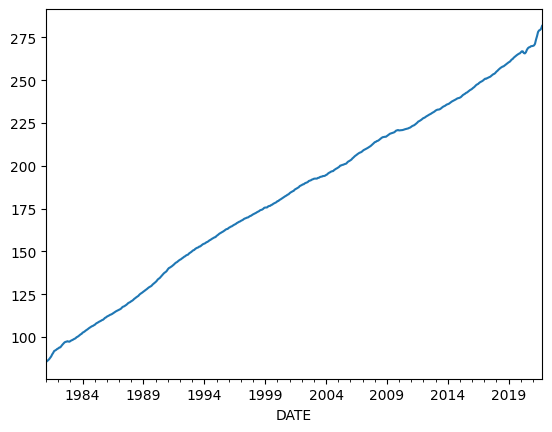

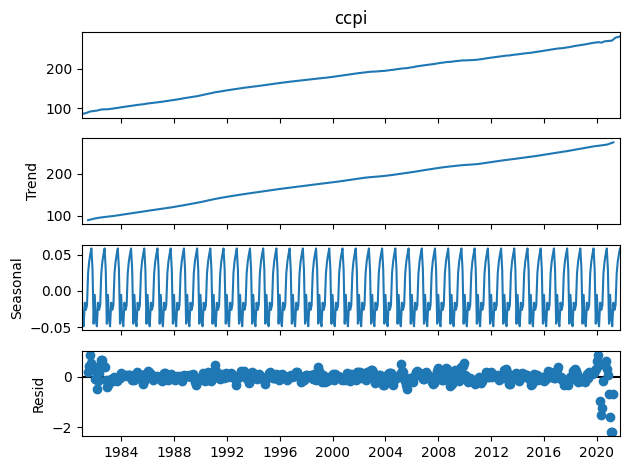

In [282]:
df['ccpi'].plot()
fig = seasonal_decompose(df['ccpi'], model='additive').plot()

The dataset exhibits a clear upward trend, indicating non-stationarity(not normal). Since the ARIMA model relies on the assumption of stationarity, it's essential to address this non-stationarity before proceeding with the modeling process.

# **Splitting the data:**

As the dataset is small, we will use the last year as the test dataset.

In [283]:
train = df[0:len(df) - 12]
test=df[len(df) - 12:]

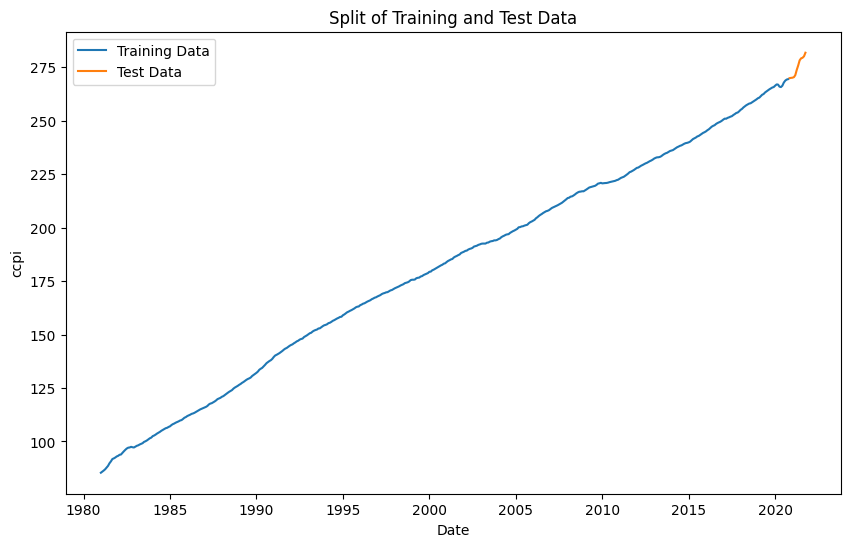

In [284]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['ccpi'], label='Training Data')
plt.plot(test.index, test['ccpi'], label='Test Data')
plt.xlabel('Date')
plt.ylabel('ccpi')
plt.title('Split of Training and Test Data')
plt.legend()
plt.show()

The plot reveals a noticeable decline in 2020, attributed to the pandemic-related restrictions. The orange line represents the test set.

# **Take first differences to Stationarize the data:**


In this process, we aim to determine the ideal number of differences needed to eliminate the unit root(non stationarity/non normality) and achieve stationarity in a time series. We achieve this by iteratively applying the diff() function to the series and testing its stationarity using the Augmented Dickey-Fuller (ADFuller) test. The objective is to identify the minimum number of differences required to render the series stationary.







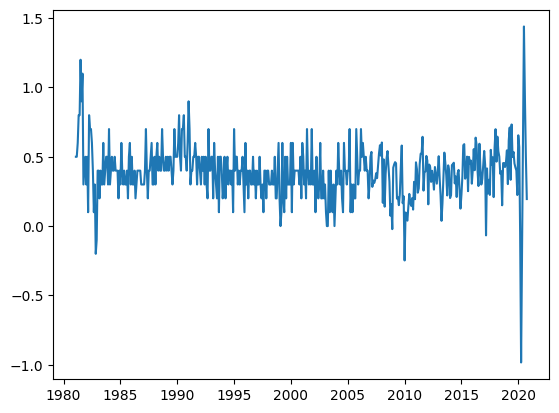

In [285]:
diff = train['ccpi'].diff()#taking 1st lag of ccpi= row1-row2
plt.plot(diff)
plt.show()

In [286]:
diff = diff.dropna()#dropping first na after differencing

# **Using the Augmented Dickey-Fuller test to verfy the stationary:**

In [287]:
from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    result = adfuller(df.values)#(test_statistic, p_value, lags_used, num_observations, critical_values)
    print(result)

    if result[1] < 0.05:
        print("Series is stationary.")  # Ha
    else:
        print("Series is not stationary.")  # H0


# Call the function with the 'diff' DataFrame or Series
adf_test(diff)
# p>0.5--> series is not stationary/reject null hypothes(reject: no relationship)
# The null hypothesis (Ho ) is that the time series data is non-stationary (i.e., it has a unit root, indicating non-stationarity),
# while the alternative hypothesis (Ha ) is that the time series data is stationary
#  (i.e., it does not have a unit root, indicating stationarity).

(-6.457979898938407, 1.4671465942141251e-08, 7, 469, {'1%': -3.444370153876086, '5%': -2.867722323562515, '10%': -2.5700629410213627}, -295.5843050899422)
Series is stationary.


# **Plot ACF and PACF:to find optimal p and q**
p = the number of lags and q = the order of the MA term.

Now, finding the order of Auto Regressive Term (p):
ACF can be useful in determining the order of autoregressive (AR) models. If the ACF shows a gradual decay or a significant cutoff after a certain lag, it suggests that the series may be suitable for modeling using an AR model.
PACF can be particularly useful in determining the order of the moving average (MA) model. If the PACF shows a significant cutoff after a certain lag, it suggests that the series may be suitable for modeling using an MA model.

n the function plot_pacf, the x-axis represents the lag values, while the y-axis represents the partial autocorrelation coefficients (PACF) corresponding to each lag.

X-axis (lag values): It indicates the number of time steps in the past that you are considering for calculating the partial autocorrelation. Each point on the x-axis represents a lag, starting from 0 (indicating the autocorrelation at lag 0) and extending to the maximum lag you specify or determine from the plot.

Y-axis (partial autocorrelation coefficients): It represents the strength and direction of the linear relationship between the series at the current time step and its previous time steps, accounting for the effect of the intermediate time steps. The partial autocorrelation at lag k measures the correlation between the series values at time t and time t-k, while removing the effects of all intermediate time steps (t-1, t-2, ..., t-k+1).

To determine the value of
�
q (the lag parameter for the Moving Average component) from the PACF plot:

Look for the significant spikes or bars that extend beyond the dashed lines (usually at a significance level of 0.05 or 0.1) in the PACF plot.
The first significant spike that crosses the dashed line from above is indicative of the
�
q value. The lag value corresponding to this spike represents the potential number of lagged observations that significantly influence the current value of the series, after accounting for the effects of shorter lags.

Spike: A spike refers to a point or bar in the plot that rises above the dashed horizontal lines, which indicate the confidence intervals. These spikes represent significant partial autocorrelation coefficients at different lags(q=1 means relationship is captured at lag 1, at first differencing). In other words, they denote the strength and significance of the relationship between the series at the current time step and its past time steps, after removing the influence of intermediate time steps.

Remaining Inside Shade: The shaded region, often represented by confidence intervals or bands, helps in identifying statistically insignificant partial autocorrelation coefficients. The values within this shaded area are considered not statistically significant and could be due to randomness or noise in the data. These coefficients do not provide strong evidence of a relationship between the series at the current time step and its past time steps after accounting for the effect of intermediate time steps.

In [67]:
!pip install statsmodels

In [288]:
from statsmodels.graphics.tsaplots import plot_pacf

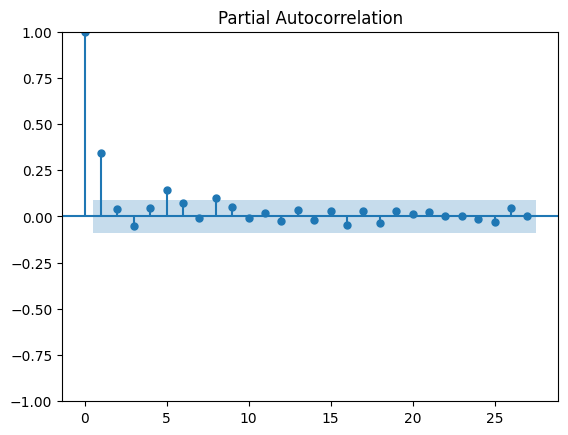

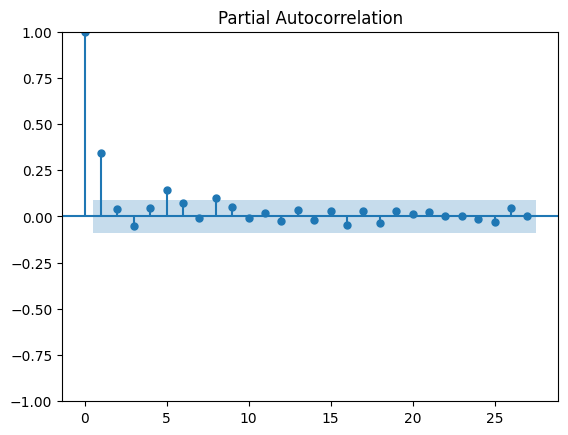

In [289]:
plot_pacf(diff.values)

Since there is only a significant spike at lag 1 and no significant spikes at higher lags in the partial autocorrelation function (PACF) plot, it suggests that the autocorrelation structure of the series can be adequately explained by including an autoregressive (AR) term of order 1.

So, we should  choose an autoregressive (AR) model of order 1 (AR(1)) to capture the autocorrelation structure in the time series data. p =1.

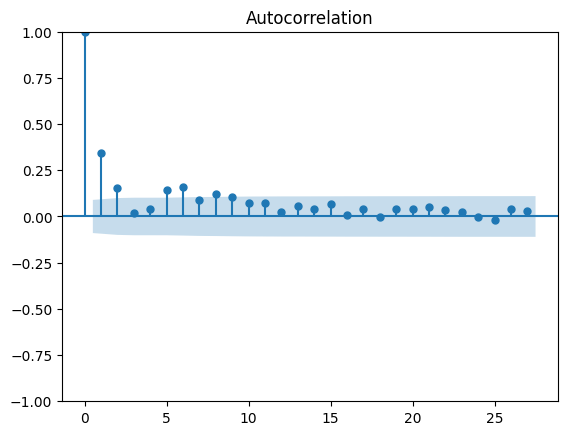

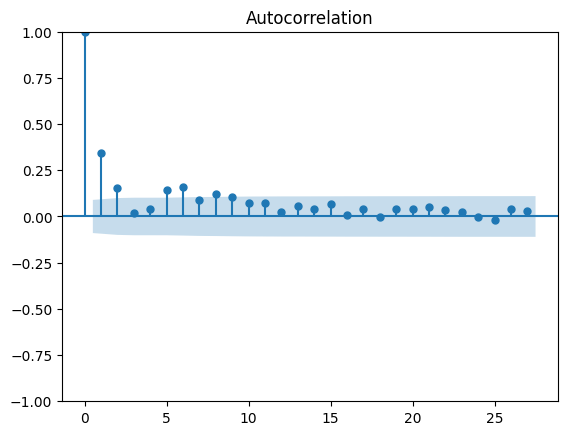

In [290]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff.values)

The ACF curve is a plot of the autocorrelation coefficient at each lag. It indicates the correlation between the time series and its lagged values.

The horizontal axis represents the lag (the number of time steps between the observations), while the vertical axis represents the autocorrelation coefficient.

Autocorrelation coefficients closer to 1 or -1 indicate stronger correlation between the time series and its lagged values. Coefficients closer to 0 suggest weak or no correlation.

Lags with autocorrelation coefficients outside the confidence interval bands (typically shaded on the plot) are considered significant.

Since the ACF shows a significant spike at lag 1 followed by a gradual decay, it indicates that the series may be suitable for modeling using a moving average (MA) model.

Hence, q = 1 = order of Moving Average Term (q)

Importantly, there are significant spikes at multiple lags, it suggests that the series may require a mixed autoregressive-moving average (ARMA) model.

Hence, for ARIMA model, p =1, q =1 and d =1 are the suitable parametres.

# **Building the model:**
Since CPI exhibits exponential growth (variance increases), we build the model on the ln(CPI) e.g. converting the raw values to log values.
As earlier discovered, the ARIMA model parameters will be set as 1,1,1.

In [291]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(np.log(train['ccpi']), order = (1,1,1))

arima_fit = arima_model.fit()
arima_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ccpi   No. Observations:                  478
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2519.892
Date:                Sun, 17 Mar 2024   AIC                          -5033.784
Time:                        23:18:58   BIC                          -5021.282
Sample:                    01-01-1981   HQIC                         -5028.869
                         - 10-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9713      0.006    152.657      0.000       0.959       0.984
ma.L1         -0.5084      0.028    -18.162      0.000      -0.563      -0.453
sigma2      1.499e-06   5.16e-08     29.055      0.000     1.4e-06     1.6e-06
===================================================================================
Ljung-Box (L1) (Q):                   1.78   Jarque-Bera (JB):               621.70
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Dependent Variable (Dep. Variable): This is the variable being modeled, which in this case is the Consumer Price Index (ccpi).

No. Observations: Indicates the number of observations used in the model, which is 478 in this case.

Model: Specifies the type of model used, which is ARIMA(1, 1, 1). This indicates that the model is an autoregressive integrated moving average model with one autoregressive term, one differencing term, and one moving average term.

Log Likelihood: The value of the log likelihood function at the maximum likelihood estimate of the model parameters. A higher value suggests a better fit.

AIC (Akaike Information Criterion): A goodness-of-fit measure that penalizes the model for the number of parameters. Lower values indicate a better fit.

BIC (Bayesian Information Criterion): Similar to AIC but with a stronger penalty for the number of parameters. Again, lower values are better.

Sample: Specifies the time range of the observations used in the model.

Covariance Type: Describes the type of covariance estimator used.

Coefficients (coef): These are the estimated coefficients of the ARIMA model. In this case, there are two coefficients: ar.L1 (autoregressive term) and ma.L1 (moving average term).

Standard Error (std err): Indicates the standard error associated with each coefficient estimate.

z-value (z): Represents the z-score, which measures the number of standard deviations a data point is from the mean. It's used to test the statistical significance of each coefficient.

P-value (P>|z|): Indicates the probability of observing a z-value as extreme as the one obtained if the null hypothesis (that the coefficient is zero) were true. Small p-values (<0.05) suggest that the coefficient is statistically significant.

Confidence Interval ([0.025, 0.975]): Provides the lower and upper bounds of the 95% confidence interval for each coefficient estimate.

sigma2: Represents the variance of the error term in the model.

Ljung-Box (L1) (Q): Tests for autocorrelation in the residuals. A small p-value (<0.05) suggests that there is significant autocorrelation.

Jarque-Bera (JB): Tests for normality of the residuals. A small p-value (<0.05) indicates that the residuals are not normally distributed.

Heteroskedasticity (H): Tests for heteroskedasticity in the residuals. A small p-value (<0.05) suggests that there is heteroskedasticity.

Skew: Measures the symmetry of the distribution of the residuals. A value close to zero indicates symmetry.

Kurtosis: Measures the "peakedness" of the distribution of the residuals. Higher values indicate heavier tails.

# **Forecast for November 2020 - October 2021:(12 data in test data set)**

In [292]:
# Define the figure size
plt.figure(figsize=(10, 6))

# Define and plot the forecast for YoY inflation
forecast_arima = arima_fit.forecast(steps=12)
forecast_arima = np.exp(forecast_arima)

<Figure size 1000x600 with 0 Axes>

In [293]:
forecast_arima

2020-11-01    269.770082
2020-12-01    270.178715
2021-01-01    270.576192
2021-02-01    270.962802
2021-03-01    271.338826
2021-04-01    271.704539
2021-05-01    272.060211
2021-06-01    272.406103
2021-07-01    272.742471
2021-08-01    273.069568
2021-09-01    273.387636
2021-10-01    273.696914
Freq: MS, Name: predicted_mean, dtype: float64

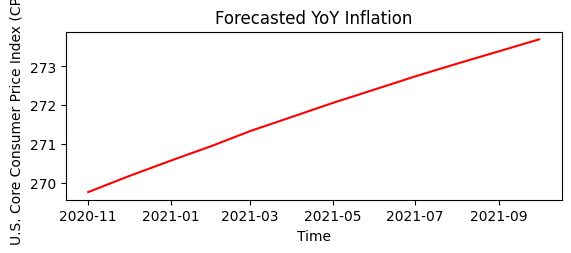

The forecasted YoY inflation is 1.44 %




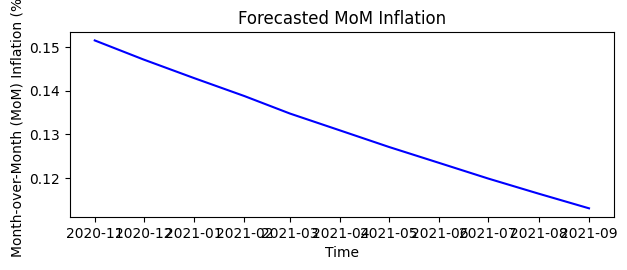

The forecasted MoM inflation is -2.84 %


In [297]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.plot(forecast_arima, color='red')
plt.title('Forecasted YoY Inflation')
plt.xlabel('Time')
plt.ylabel('U.S. Core Consumer Price Index (CPI)')
plt.show()

# Calculate YoY inflation
last_year_value = df.iloc[-12]['ccpi']
current_value = forecast_arima[-1]# last value
yoy_inflation = ((current_value - last_year_value) / last_year_value) * 100
print('The forecasted YoY inflation is', round(yoy_inflation, 2), '%')

print('\n')

# Define and plot the forecast for MoM inflation
plt.subplot(2, 1, 2)
mom_values = np.diff(forecast_arima) / forecast_arima[:-1] * 100
plt.plot(mom_values, color='blue')
plt.title('Forecasted MoM Inflation')
plt.xlabel('Time')
plt.ylabel('Month-over-Month (MoM) Inflation (%)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Calculate MoM inflation
last_month_value = df.iloc[-1]['ccpi']
mom_inflation = ((current_value - last_month_value) / last_month_value) * 100
print('The forecasted MoM inflation is', round(mom_inflation, 2), '%')

# **Future forcasting for a year:**

In [215]:
# Print the forecasted values
for i, value in enumerate(forecast_arima, 1):
    print(f'The Core CPI value for month {test.index[-1].month + i}/{test.index[-1].year} predicted by ARIMA model is {round(value, 2)}')

The Core CPI value for month 11/2021 predicted by ARIMA model is 269.77
The Core CPI value for month 12/2021 predicted by ARIMA model is 270.18
The Core CPI value for month 13/2021 predicted by ARIMA model is 270.58
The Core CPI value for month 14/2021 predicted by ARIMA model is 270.96
The Core CPI value for month 15/2021 predicted by ARIMA model is 271.34
The Core CPI value for month 16/2021 predicted by ARIMA model is 271.7
The Core CPI value for month 17/2021 predicted by ARIMA model is 272.06
The Core CPI value for month 18/2021 predicted by ARIMA model is 272.41
The Core CPI value for month 19/2021 predicted by ARIMA model is 272.74
The Core CPI value for month 20/2021 predicted by ARIMA model is 273.07
The Core CPI value for month 21/2021 predicted by ARIMA model is 273.39
The Core CPI value for month 22/2021 predicted by ARIMA model is 273.7


In [84]:
# Forecast next 12 months
forecast_arima = arima_fit.forecast(steps=12)
forecast_arima = np.exp(forecast_arima)

# Calculate yearly inflation
current_cpi = test['ccpi'].iloc[-1]  # Current CPI value
future_cpi = forecast_arima[-1]  # CPI value at the end of the forecast period
yearly_inflation = ((future_cpi - current_cpi) / current_cpi) * 100

# Print the forecasted yearly inflation
print('The forecasted yearly inflation rate is', round(yearly_inflation, 2), '%')

The forecasted yearly inflation rate is -2.84 %


# **Calculating the evaluation Metrics:**

In [294]:
import pandas as pd

# Convert forecast_arima series to DataFrame
y_forecast = pd.DataFrame(forecast_arima)

# Specify the column name
y_forecast.columns = ['cpi']

# Reset the index to make the dates a column
y_forecast.reset_index(inplace=True)

# Rename the 'index' column to 'Date'
y_forecast.rename(columns={'index': 'Date'}, inplace=True)

# Display the DataFrame
y_forecast

,Date,cpi
0,2020-11-01,269.770082
1,2020-12-01,270.178715
2,2021-01-01,270.576192
3,2021-02-01,270.962802
4,2021-03-01,271.338826
5,2021-04-01,271.704539
6,2021-05-01,272.060211
7,2021-06-01,272.406103
8,2021-07-01,272.742471
9,2021-08-01,273.069568


In [295]:
y_test_cpi = df['ccpi'].iloc[-12:]
y_test_cpi

DATE
2020-11-01    269.819
2020-12-01    269.940
2021-01-01    270.025
2021-02-01    270.299
2021-03-01    271.214
2021-04-01    273.700
2021-05-01    275.718
2021-06-01    278.140
2021-07-01    279.054
2021-08-01    279.338
2021-09-01    280.017
2021-10-01    281.695
Freq: MS, Name: ccpi, dtype: float64

In [296]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_test_cpi=df['ccpi'].iloc[-12:]
# Calculate Mean Absolute Error (MAE)
mae_arima = mean_absolute_error(y_test_cpi, y_forecast['cpi'])
print("Mean Absolute Error (MAE):", mae_arima)

# Calculate Mean Squared Error (MSE)
mse_arima = mean_squared_error(y_test_cpi,  y_forecast['cpi'])
print("Mean Squared Error (MSE):", mse_arima)

# Calculate Root Mean Squared Error (RMSE)
rmse_arima = np.sqrt(mse_arima)
print("Root Mean Squared Error (RMSE):", rmse_arima)

Mean Absolute Error (MAE): 3.3518342592118984
Mean Squared Error (MSE): 19.842063522163556
Root Mean Squared Error (RMSE): 4.45444312144218


# **Working on RNN Model:**

Steps:

Prepare the Data:

Ensure that your DataFrame is sorted by date and the index is set to the datetime column.
Split the data into training and testing sets. You can use a certain percentage of the data for training and the rest for testing.

Feature Scaling:

Scale the features to a similar range using techniques like Min-Max scaling or Standardization.

Create Sequences:

Convert the time series data into sequences suitable for input to the RNN. Each sequence will consist of a window of past observations and the corresponding target value.

Build the RNN Model:

Define the architecture of the RNN model. You can use libraries like TensorFlow or PyTorch to create your RNN model. LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Unit) layers are commonly used in time series forecasting tasks.

Train the Model:

Train the RNN model using the training data. Adjust the hyperparameters such as the number of epochs, batch size, and learning rate to optimize performance.

Evaluate the Model:

Evaluate the trained model using the testing data. Calculate evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE) to assess the model's performance.

Make Forecasts:

Use the trained model to make forecasts for future time steps.

# **Comparision between RNN and LSTM:**

The main difference between a simple RNN and an LSTM lies in their internal architecture and the way they handle long-range dependencies in sequential data. LSTM units incorporate additional memory cells and gating mechanisms that allow them to better capture long-term dependencies compared to traditional RNNs.

In terms of coding terminology, both RNNs and LSTMs are implemented similarly in Keras, using the same Sequential model and LSTM layer. However, the choice of layer and its parameters (such as the number of units, activation function, etc.) determines whether you are building a simple RNN or an LSTM model.

If you want to define a simple RNN within a Sequential model, you can replace the LSTM layer with the SimpleRNN layer provided by Keras.

The key difference between SimpleRNN and LSTM lies in their internal architectures and capabilities.

RNN:suffers from the vanishing gradient problem, making it difficult to capture long-term dependencies in sequences as it captures only current input and the previous state.

LSTM:addresses the vanishing gradient problem, introducing a more complex architecture with memory cells and multiple gates( input gate, forget gate, and output gate), enabling them to capture both short-term and long-term dependencies more effectively.

# **Data processing:**

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 490 entries, 1981-01-01 to 2021-10-01
Freq: MS
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   unrate  490 non-null    float64
 1   psr     490 non-null    float64
 2   m2      490 non-null    float64
 3   dspic   490 non-null    float64
 4   pce     490 non-null    float64
 5   reer    490 non-null    float64
 6   ir      490 non-null    float64
 7   ffer    490 non-null    float64
 8   tcs     490 non-null    float64
 9   indpro  490 non-null    float64
 10  ccpi    490 non-null    float64
dtypes: float64(11)
memory usage: 45.9 KB


In [168]:
# Make sure DataFrame with the datetime index set
#df.set_index('DATE', inplace=True)

# **Differentiating to stationarize the series**

In [301]:
df = df.diff().dropna()

# **Checking Stationarity using ADFuller:**

In [302]:
from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    result = adfuller(df.values)#(test_statistic, p_value, lags_used, num_observations, critical_values)

    if result[1] < 0.05:
        print("Series is stationary.")  # Ha
    else:
        print("Series is not stationary.")  # H0


#printing the stattionarity feature-wise
for f in df:
    print('ADF Test: ', f)
    adf_test(df[[f]])


ADF Test:  unrate
Series is stationary.
ADF Test:  psr
Series is stationary.
ADF Test:  m2
Series is not stationary.
ADF Test:  dspic
Series is stationary.
ADF Test:  pce
Series is stationary.
ADF Test:  reer
Series is stationary.
ADF Test:  ir
Series is stationary.
ADF Test:  ffer
Series is stationary.
ADF Test:  tcs
Series is not stationary.
ADF Test:  indpro
Series is stationary.
ADF Test:  ccpi
Series is not stationary.


After first differencing, M2, TCS and CCPI are still not stationary, so we will take the second differencing for these indicators and check if it still contains unit root.

In [172]:
df[['m2']] = df[['m2']].diff().dropna()
df[['tcs']] = df[['tcs']].diff().dropna()
df[['ccpi']] = df[['ccpi']].diff().dropna()

In [174]:
df.dropna(inplace=True)#dropping the first nan row after differencing

In [303]:
df.head()

,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
DATE,,,,,,,,,,,
1981-02-01,-0.1,-0.1,-4.775,-15.4,14.2,0.0,0.625873,-3.150230,-12496.988452,-0.2159,0.5
1981-03-01,0.0,0.0,21.275,14.0,18.7,0.0,-0.078535,-1.230415,0.000000,0.2557,0.5
1981-04-01,-0.2,0.1,36.175,-13.9,1.5,0.0,0.563615,1.015129,12496.988452,-0.2355,0.6
1981-05-01,0.3,0.1,-10.425,9.7,9.4,0.0,0.419976,2.798742,0.000000,0.2934,0.8
1981-06-01,0.0,-0.2,9.350,27.1,20.7,0.0,-0.627227,0.581925,-12496.988452,0.2602,0.8


In [176]:
#printing the stattionarity again feature-wise
for f in df:
    print('ADF Test: ', f)
    adf_test(df[[f]])

ADF Test:  unrate
Series is stationary.
ADF Test:  psr
Series is stationary.
ADF Test:  m2
Series is stationary.
ADF Test:  dspic
Series is stationary.
ADF Test:  pce
Series is stationary.
ADF Test:  reer
Series is stationary.
ADF Test:  ir
Series is stationary.
ADF Test:  ffer
Series is stationary.
ADF Test:  tcs
Series is stationary.
ADF Test:  indpro
Series is stationary.
ADF Test:  ccpi
Series is stationary.


M2, TCS and CCPI are now stationary after second differencing. We can proceed to use Grangers Causality Test to investigate causality between our features and Core CPI. Granger causality is a statistical concept of causality that is based on prediction and is highly relevant in financial economics.

# **Granger Casualty Test:**
The result granger casualty test with p >0.05 suggests the irrelivance of features to predict the target variable. So, we drop the features with p >0.05.

In [178]:
from statsmodels.tsa.stattools import grangercausalitytests

def grangers_causation_matrix(data, variables, maxlag=12, test='ssr_chi2test', verbose=False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1], 4) for i in range(maxlag)]
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    return df

In [179]:
grangers_matrix = grangers_causation_matrix(df, variables=df.columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print resul

In [180]:
grangers_matrix

,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
unrate,1.0000,0.0006,0.0000,0.0060,0.0000,0.0001,0.0075,0.0000,0.2271,0.0000,0.0017
psr,0.0000,1.0000,0.0000,0.0000,0.0000,0.0118,0.4294,0.0257,0.0000,0.0000,0.0000
m2,0.0000,0.0000,1.0000,0.0000,0.0000,0.0041,0.2005,0.0404,0.0136,0.0000,0.0000
dspic,0.0000,0.0000,0.0000,1.0000,0.0000,0.1267,0.4631,0.2412,0.0000,0.0000,0.0000
pce,0.0000,0.0000,0.0000,0.0000,1.0000,0.0020,0.0861,0.1301,0.0071,0.0000,0.0015
reer,0.2067,0.3703,0.0156,0.2138,0.0658,1.0000,0.2127,0.3829,0.2458,0.0377,0.0700
ir,0.5665,0.3161,0.4029,0.7856,0.5925,0.1617,1.0000,0.0000,0.0750,0.5430,0.1450
ffer,0.6451,0.7619,0.8770,0.7403,0.8952,0.4784,0.0000,1.0000,0.4149,0.3308,0.0227
tcs,0.0008,0.0010,0.0001,0.0055,0.0000,0.0005,0.1825,0.0770,1.0000,0.0003,0.1582
indpro,0.0000,0.0000,0.0000,0.0000,0.0000,0.0003,0.0002,0.0002,0.0153,1.0000,0.0013


Here, we can focus on just the last row, and we will be using a significance level of 0.05 like earlier, hence any p-values that are less than 0.05, we can reject the null hypothesis and conclude that the feature granger causes Core CPI.

Real Effective Exchange Rate, 10Y Treasury Yield and Fed Rate are not significant, thus we can first proceed to exclude them from our future models, dropping them from the dataframe.

In [181]:
df = df.drop(['reer', 'ir','ffer'], axis = 1)

In [182]:
df.head()

,unrate,psr,m2,dspic,pce,tcs,indpro,ccpi
DATE,,,,,,,,
1981-03-01,0.0,0.0,26.050,14.0,18.7,12496.988452,0.2557,0.0
1981-04-01,-0.2,0.1,14.900,-13.9,1.5,12496.988452,-0.2355,0.1
1981-05-01,0.3,0.1,-46.600,9.7,9.4,-12496.988452,0.2934,0.2
1981-06-01,0.0,-0.2,19.775,27.1,20.7,-12496.988452,0.2602,0.0
1981-07-01,-0.3,1.5,11.375,78.9,7.6,42695.732593,0.3480,0.4


# **Feature Scaling:**

In [183]:
from sklearn.preprocessing import MinMaxScaler
# Feature scaling
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df

array([[0.17460317, 0.40345821, 0.4359791 , ..., 0.71195875, 0.72727273,
        0.48976941],
       [0.15873016, 0.40634006, 0.42575959, ..., 0.71195875, 0.70081391,
        0.52224748],
       [0.1984127 , 0.40634006, 0.36939187, ..., 0.47356153, 0.72930346,
        0.55472556],
       ...,
       [0.15873016, 0.3832853 , 0.47819073, ..., 0.72462557, 0.70606043,
        0.28515752],
       [0.14285714, 0.35446686, 0.40648   , ..., 0.4234764 , 0.65828696,
        0.61805781],
       [0.15873016, 0.37752161, 0.39214976, ..., 0.64354144, 0.80398821,
        0.8142254 ]])

# **Create the Sequence for sequential data:**

In [184]:
# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # Define the length of the input sequence
X, y = create_sequences(df, seq_length)

In [185]:
print(X.shape)

(476, 12, 8)


In [186]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [187]:
X_train.shape

(380, 12, 8)

# **Building the Simple RNN model:**

In [188]:
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential

In [201]:
# Build the Simple RNN model
rnn_model = Sequential([
    SimpleRNN(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)#input_shape=no_time_steps*no_features
])

# In one iteration (or forward pass) of the model, each of the 50 neurons in the SimpleRNN layer processes
# the input sequences with shape (12, 11) across all 12 time steps. Each neuron receives input from all
# 11 features at each time step. Therefore, the total number of data points processed in one iteration would be 50 * 12 * 11.

rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
rnn_model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

# Verbpse:
# It determines whether the progress of the training should be displayed in the console or not.
# verbose=0: Silent mode. No output will be printed during the training.
# verbose=1: Progress bar mode. It displays a progress bar that shows the training progress for each epoch.
# verbose=2: Verbose mode. It displays one line per epoch showing the epoch number and the training loss.

# Evaluate the model
loss_rnn = rnn_model.evaluate(X_test, y_test)
print("Test Loss:", loss_rnn)

# Make forecasts
forecast_rnn = rnn_model.predict(X_test)


Epoch 1/25
12/12 [==============================] - 3s 12ms/step - loss: 0.0966
Epoch 2/25
12/12 [==============================] - 0s 8ms/step - loss: 0.0353
Epoch 3/25
12/12 [==============================] - 0s 13ms/step - loss: 0.0288
Epoch 4/25
12/12 [==============================] - 0s 11ms/step - loss: 0.0286
Epoch 5/25
12/12 [==============================] - 0s 11ms/step - loss: 0.0282
Epoch 6/25
12/12 [==============================] - 0s 12ms/step - loss: 0.0280
Epoch 7/25
12/12 [==============================] - 0s 12ms/step - loss: 0.0280
Epoch 8/25
12/12 [==============================] - 0s 12ms/step - loss: 0.0279
Epoch 9/25
12/12 [==============================] - 0s 13ms/step - loss: 0.0279
Epoch 10/25
12/12 [==============================] - 0s 12ms/step - loss: 0.0279
Epoch 11/25
12/12 [==============================] - 0s 13ms/step - loss: 0.0279
Epoch 12/25
12/12 [==============================] - 0s 12ms/step - loss: 0.0278
Epoch 13/25
12/12 [===================

# **Evaluating the performance metric:**

In [193]:
X_test.shape,forecast_rnn.shape,  y_test.shape

((96, 12, 8), (96, 1), (96, 8))

In [196]:
y_test_cpi=y_test[:,-1]

In [202]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae_rnn = mean_absolute_error(y_test_cpi, forecast_rnn)
print("Mean Absolute Error (MAE):", mae_rnn)

# Calculate Mean Squared Error (MSE)
mse_rnn = mean_squared_error(y_test_cpi, forecast_rnn)
print("Mean Squared Error (MSE):", mse_rnn)

# Calculate Root Mean Squared Error (RMSE)
rmse_rnn = np.sqrt(mse_rnn)
print("Root Mean Squared Error (RMSE):", rmse_rnn)

Mean Absolute Error (MAE): 0.08472307617766557
Mean Squared Error (MSE): 0.017961402976126032
Root Mean Squared Error (RMSE): 0.13402015884233995


# **Building LSTM Model:**

In [203]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the RNN model
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Make forecasts
forecast_lstm = model.predict(X_test)


Epoch 1/50
12/12 [==============================] - 2s 7ms/step - loss: 0.2314
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0414
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0316
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0295
Epoch 5/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0276
Epoch 6/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0274
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0274
Epoch 8/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0274
Epoch 9/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0273
Epoch 10/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0273
Epoch 11/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0273
Epoch 12/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0273
Epoch 13/50
12/12 [==============================

3/3 [==============================] - 0s 7ms/step - loss: 0.0387
Test Loss: 0.03874419257044792


3/3 [==============================] - 0s 5ms/step


# **Evaluating the performance metric:**

In [204]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae_lstm = mean_absolute_error(y_test_cpi, forecast_lstm)
print("Mean Absolute Error (MAE):", mae_lstm)

# Calculate Mean Squared Error (MSE)
mse_lstm = mean_squared_error(y_test_cpi, forecast_lstm)
print("Mean Squared Error (MSE):", mse_lstm)

# Calculate Root Mean Squared Error (RMSE)
rmse_lstm = np.sqrt(mse_lstm)
print("Root Mean Squared Error (RMSE):", rmse_lstm)

Mean Absolute Error (MAE): 0.08369389965890744
Mean Squared Error (MSE): 0.015998939405067237
Root Mean Squared Error (RMSE): 0.12648691396767983


In [307]:
import pandas as pd

# Define the models, metrics, and their corresponding values
models = ['ARIMA', 'RNN', 'LSTM']
metrics = ['MAE', 'MSE', 'RMSE']
values = [[mae_arima, mse_arima, rmse_arima],
          [mae_rnn, mse_rnn, rmse_rnn],
          [mae_lstm, mse_lstm, rmse_lstm]]

# Create a DataFrame
data = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': []}
for model, metrics_row in zip(models, values):
    data['Model'].append(model)
    for metric, value in zip(metrics, metrics_row):
        data[metric].append(value)

metrics_df = pd.DataFrame(data)

# Display the DataFrame
print(metrics_df)



   Model       MAE        MSE      RMSE
0  ARIMA  3.351834  19.842064  4.454443
1    RNN  0.084723   0.017961  0.134020
2   LSTM  0.083694   0.015999  0.126487


On the basis of these metrics, LSTM model can be considered effective for this forecasting task.

# **Thank you!**